# how to explore and split photos that exist  in one folder 

In [1]:

import tensorflow as tf
import numpy as np
import os
from imutils import paths
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [2]:
# pip install opencv-python  # import cv2
# pip install imutils
# pip install -U scikit-learn


In [3]:
os.getcwd()

'C:\\Users\\hmohammad\\Desktop\\udacity\\machine_learning\\tensorflow\\explore photos 1'

In [4]:
path = os.path.join(os.getcwd(), 'animal_database')
path

'C:\\Users\\hmohammad\\Desktop\\udacity\\machine_learning\\tensorflow\\explore photos 1\\animal_database'

In [16]:
# to call / read all images pathes 
imagepaths = list(paths.list_images(path))
# to explorer one image path
imagepaths[0]

'C:\\Users\\hmohammad\\Desktop\\udacity\\machine_learning\\tensorflow\\explore photos 1\\animal_database\\bear\\test\\1_80.jpg'

In [19]:
# note \\ is separate the and the image name is the last part and the animal folder(class name) is the third part from the end 
print(imagepaths[0].split('\\')[-1])
print(imagepaths[0].split('\\')[-3])

1_80.jpg
bear


In [20]:
# to change the image order randmly 
random.shuffle(imagepaths)

In [34]:
# function to get the class name in one list
def get_calssnames(path):
    '''
    collect the class names in one list
    
    Args:
      path  : the path of the image folder        
    Returns:
      list :  calss names 
     ''' 
    class_names = []
    for imagepath in path:
        label = imagepath.split('\\')[-3]
        if label not in class_names:
            class_names.append(label)
    return class_names


In [35]:
classes = get_calssnames(imagepaths)

In [36]:
classes

['zebra',
 'leopard',
 'bear',
 'horse',
 'coyote',
 'deer',
 'gorilla',
 'tiger',
 'penquin',
 'skunk',
 'lion',
 'panda',
 'sheep',
 'goat',
 'elephant',
 'cow',
 'cougar',
 'giraffe',
 'kangaroo']

In [52]:
# index function get name and return number ( the index for that name )
classes.index('zebra')

0

In [38]:
# put this code (imagepaths[0].split('\\')[-3]) instead of the name of the image so we can use in a function (i = 0)
classes.index(imagepaths[0].split('\\')[-3])

0

In [54]:
classes[0]

'zebra'

In [39]:
def prepare_dataset(path, labels):
    '''
    prepare the data set and divid it to 4 parts   X_train , X_test ,  y_train , y_test 
    
    Args:
      path  : the path of the image folder 
      labels : the class names that got from get_calssnames function
    Returns:
      matrix :  X_train, X_test, y_train, y_test
     ''' 
    
    X_train = []
    X_test = []
    y_train = []
    y_test = []

    for imagepath in path:
        image = cv2.imread(imagepath) # to read the photo as a matrix 
        if imagepath.split('\\')[-2] == 'train':
            X_train.append(image)
            # labels.index('bear') # to transfer categorical to numerical 
            # imagepaths[18].split('\\')[-3]
            # labels.index(imagepaths[18].split('\\')[-3])
            y_train.append(classes.index(imagepath.split('\\')[-3]))
        elif imagepath.split('\\')[-2] == 'test' :
            X_test.append(image)
            y_test.append(classes.index(imagepath.split('\\')[-3]))
    return X_train, X_test, y_train, y_test



In [49]:
[X_train, X_test, y_train, y_test] = prepare_dataset(imagepaths, classes)

In [50]:
X_train[1]

array([[[ 38,  56,  27],
        [ 32,  50,  21],
        [  9,  28,   3],
        ...,
        [ 50,  68,  75],
        [ 44,  58,  70],
        [ 70,  83,  97]],

       [[ 60,  80,  51],
        [ 36,  56,  27],
        [ 22,  41,  14],
        ...,
        [ 32,  48,  55],
        [ 44,  56,  68],
        [ 94, 105, 119]],

       [[ 50,  73,  41],
        [ 32,  56,  24],
        [ 27,  51,  21],
        ...,
        [ 54,  66,  76],
        [ 52,  61,  75],
        [103, 111, 128]],

       ...,

       [[ 72, 110,  68],
        [107, 145, 103],
        [101, 139,  97],
        ...,
        [106, 144, 102],
        [ 91, 131,  89],
        [ 86, 129,  86]],

       [[101, 141,  99],
        [ 93, 133,  91],
        [ 92, 132,  90],
        ...,
        [115, 154, 109],
        [ 79, 120,  75],
        [ 83, 126,  81]],

       [[103, 143, 101],
        [114, 154, 112],
        [ 98, 138,  96],
        ...,
        [106, 145, 100],
        [ 85, 126,  81],
        [ 82, 125,  80]]

In [51]:
y_train[1]

3

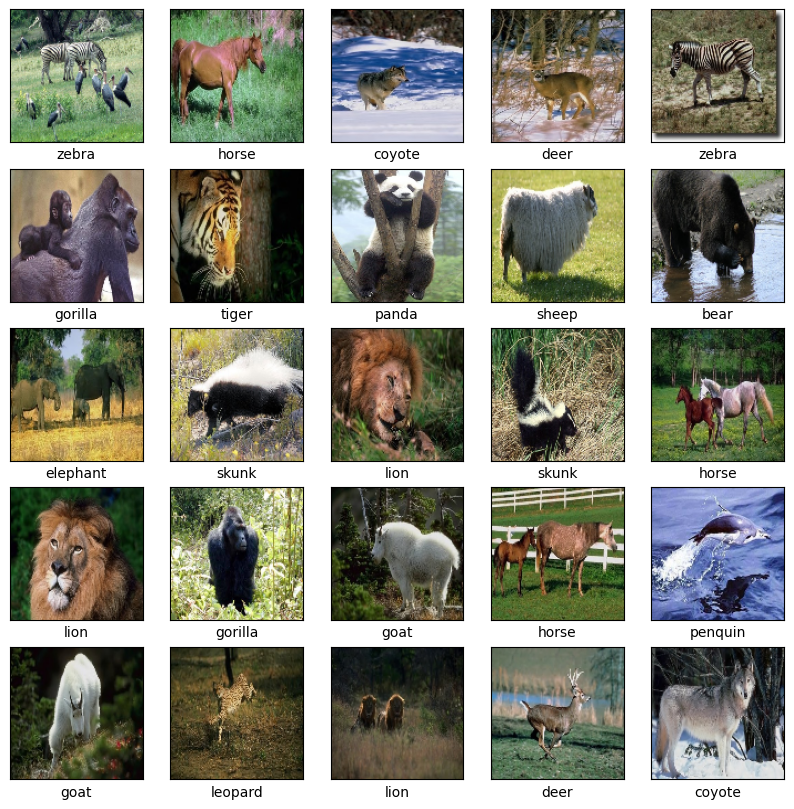

In [53]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    imag = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
#     plt.xlabel(y_train[i])
    imag = cv2.resize(imag,(120,120)) # to make the size is the same for all images 
    plt.xlabel(classes[y_train[i]])
    plt.imshow(imag)

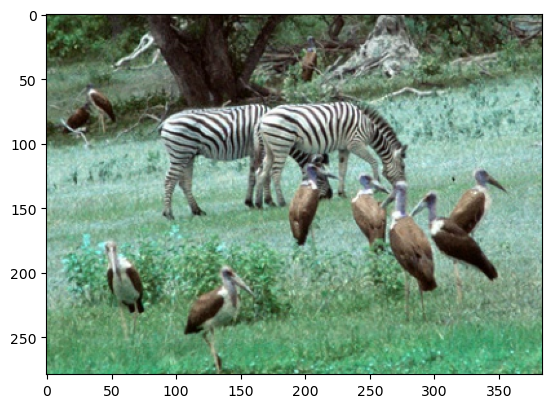

In [55]:
plt.imshow(X_train[0])

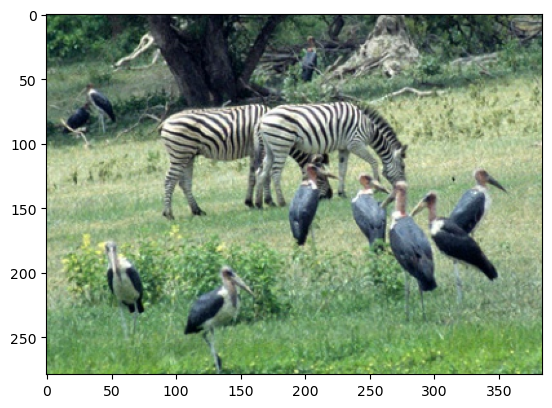

In [56]:
imag = cv2.cvtColor(X_train[0], cv2.COLOR_BGR2RGB) # to adjust colors from BGR to RGB
plt.imshow(imag)

# in below celss will explain the code step by step 

<Axes: >

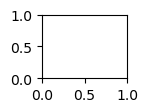

In [57]:
plt.subplot(5, 5, 3)

In [58]:
# locs, labels = xticks()  # Get the current locations and labels.
# plt.xticks([np.arange(0, 2, step=0.2)])  # Set label locations.
# xticks(np.arange(3), ['Tom', 'Dick', 'Sue'])  # Set text labels.
# plt.xticks([0, 1, 2], ['January', 'February', 'March'], rotation=20)  # Set text labels and properties.
# xticks([])  # Disable xticks.

([], [])

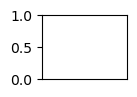

In [59]:
plt.subplot(5, 5, 1)
plt.xticks([]) # Disable xticks.

([], [])

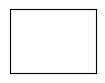

In [60]:
plt.subplot(5, 5, 6)
plt.xticks([]) # Disable xticks.
plt.yticks([])# Disable yticks.

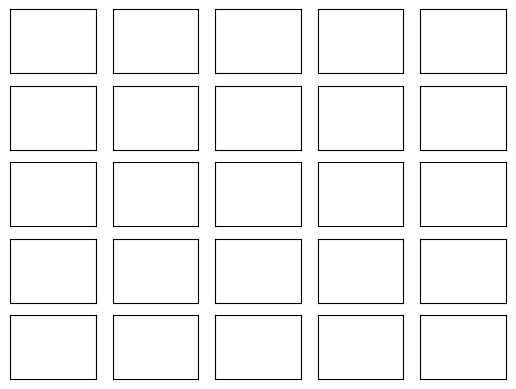

In [61]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])

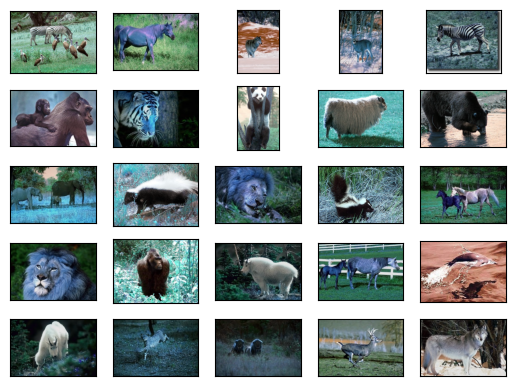

In [62]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])

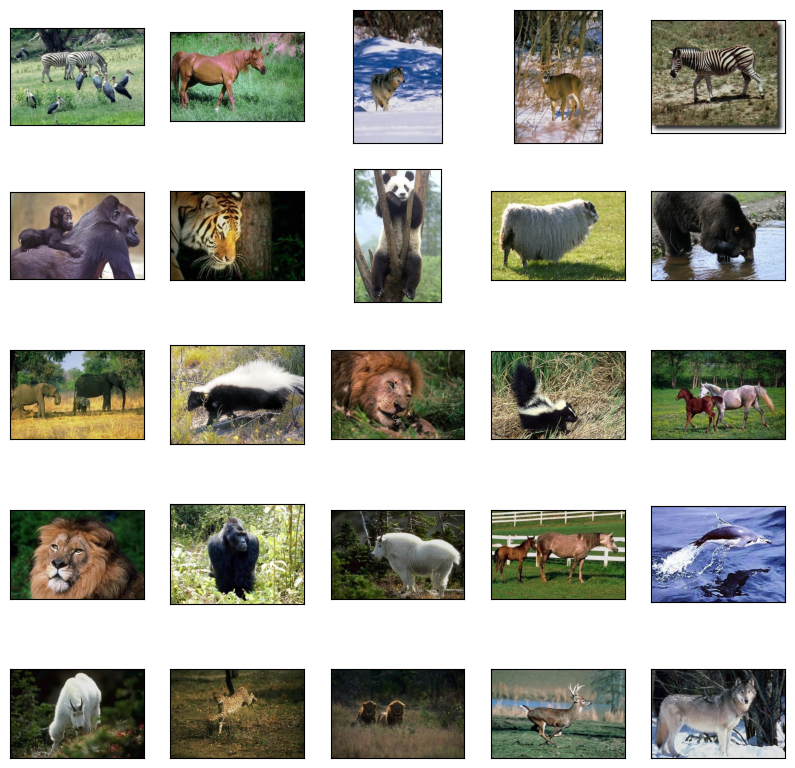

In [63]:
plt.figure(figsize =(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    imag = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(imag)

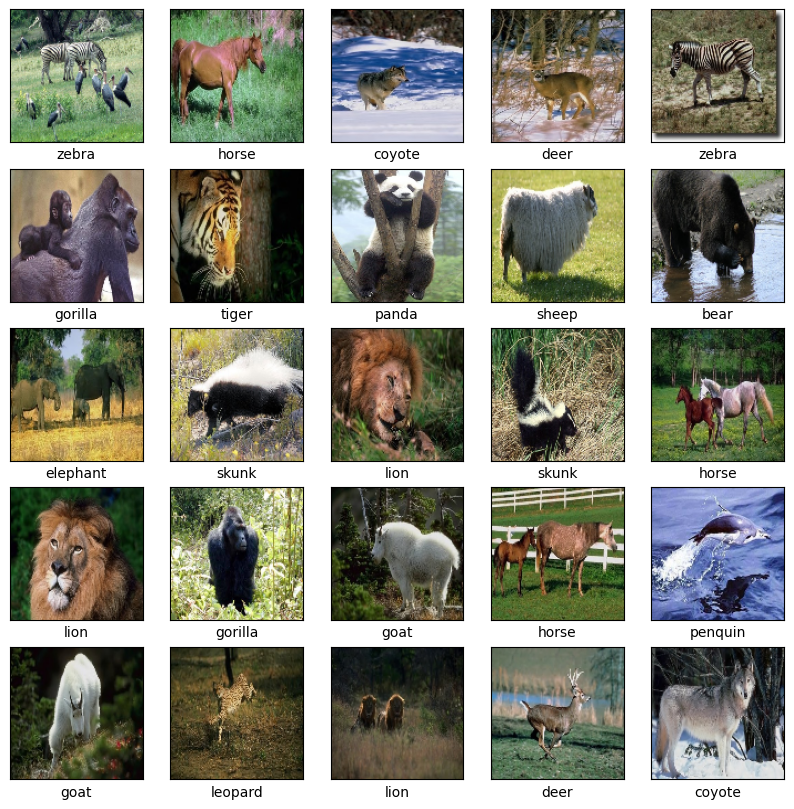

In [64]:
plt.figure(figsize =(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    imag = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    imag = cv2.resize(imag, (120, 120))
    plt.xlabel(labels[y_train[i]])
    plt.imshow(imag)

### DONE by Hisham Hindawy 

In [65]:
# thanks 